# Pandas基础学习【1】
  
大家可以参考pandas的文档或一些整理教程进行学习和查询：  

**官方快速入门文档：**
> https://pandas.pydata.org/docs/getting_started/10min.html#min

In [1]:
import numpy as np
import pandas as pd

In [4]:
pd.__version__

'0.20.3'

## 读写数据文件

### csv文件

In [2]:
df_csv = pd.read_csv('./data/data1_try_read.csv', encoding='utf-8')  # gbk，gb2312， gb18030

In [3]:
# 查看读取数据
df_csv

城市   猫  年龄    体重
0  北京  波斯   7   8.5
1  杭州  布偶   1  10.2
2  曼谷  暹罗   4   6.8

In [4]:
df_csv.loc[0, '城市']

'北京'

In [5]:
df_csv.loc[0, '城市'] = '上海'
df_csv

城市   猫  年龄    体重
0  上海  波斯   7   8.5
1  杭州  布偶   1  10.2
2  曼谷  暹罗   4   6.8

In [12]:
# df_csv.to_csv('./data/data1_try_output.csv', encoding='utf-8')
df_csv.to_csv('./data/data1_try_output.tsv', sep='\t', encoding='utf-8', index=None, header=None)

### excel文件

In [14]:
df_excel = pd.read_excel('./data/data2_try_read.xlsx')

In [15]:
df_excel

科目   成绩   学生
0  英语  100  韩梅梅
1  数学   90   李雷
2  语文   59   李雷

In [16]:
df_excel.loc[3] = ['语文', 60, '韩梅梅']
df_excel

科目   成绩   学生
0  英语  100  韩梅梅
1  数学   90   李雷
2  语文   59   李雷
3  语文   60  韩梅梅

In [17]:
df_excel.to_excel('./data/data2_try_output.xlsx', index=None, sheet_name='成绩单')

## 基本数据类型

### 第一种数据类型：Series

In [19]:
sr1 = pd.Series([1, 2, 3, 4], index=[101, 102, 103, 104])
sr1

101    1
102    2
103    3
104    4
dtype: int64

#### Series的常见属性

In [20]:
sr1.dtype

dtype('int64')

In [21]:
sr1.name

In [22]:
sr1.name = '有名字了'
sr1

101    1
102    2
103    3
104    4
Name: 有名字了, dtype: int64

In [23]:
sr1.name

'有名字了'

In [24]:
sr1.index

Int64Index([101, 102, 103, 104], dtype='int64')

In [25]:
sr1.values

array([1, 2, 3, 4], dtype=int64)

#### Series的索引和切片

*简单索引和切片*

In [26]:
# 索引默认是loc
sr1[102]

2

In [27]:
# 切片默认是iloc
sr1[102:104]

Series([], Name: 有名字了, dtype: int64)

In [28]:
sr1[1:3]

102    2
103    3
Name: 有名字了, dtype: int64

*.loc按索引名称(会包含终止的名称)*

In [44]:
sr1.loc[102]

2

In [29]:
sr1.loc[102:104]

102    2
103    3
104    4
Name: 有名字了, dtype: int64

In [50]:
sr1.loc[[101, 103]]

101    1
103    3
Name: 有名字了, dtype: int64

In [104]:
sr1.loc[[True, False, False, True]]

101    1
104    4
Name: 有名字了, dtype: int64

In [30]:
sr1

101    1
102    2
103    3
104    4
Name: 有名字了, dtype: int64

In [105]:
sr1>2

101    False
102    False
103     True
104     True
Name: 有名字了, dtype: bool

In [106]:
sr1.loc[sr1>2]

103    3
104    4
Name: 有名字了, dtype: int64

*.iloc按索引下标*

In [45]:
sr1.iloc[2]

3

In [31]:
sr1.iloc[2:4]

103    3
104    4
Name: 有名字了, dtype: int64

In [107]:
sr1.iloc[[1, 3]]

102    2
104    4
Name: 有名字了, dtype: int64

#### Series的增删改

**增添和更改值**  
实际上，增和改就是在索引定位的基础上进行赋值操作

In [116]:
# 原始Series
sr1

101    1
102    2
103    3
104    4
dtype: int64

In [117]:
# 按索引更改单个值
sr1.loc[101] = 666
sr1

101    666
102      2
103      3
104      4
dtype: int64

In [118]:
# 按切片更改多个值
sr1.iloc[2:4] = [33, 44]
sr1

101    666
102      2
103     33
104     44
dtype: int64

In [119]:
(sr1>10) & (sr1<100)

101    False
102    False
103     True
104     True
dtype: bool

In [120]:
# 按逻辑索引更改符合条件的多个值
sr1.loc[(sr1>10) & (sr1<100)] = 0
sr1

101    666
102      2
103      0
104      0
dtype: int64

In [121]:
# 增加一个值
sr1.loc[105] = 5
sr1

101    666
102      2
103      0
104      0
105      5
dtype: int64

**删除值**  
实际上，删除就是在索引定位的基础上进行`drop`操作  
> 注意：  
* drop删除只能使用名称索引  
* drop方法仅返回一个新对象，不影响原Series，要更改原Series对象则需要设置inplace参数

In [124]:
sr1.drop(102)

101    666
103      0
104      0
105      5
dtype: int64

In [125]:
# 注意，drop方法仅返回一个新对象，不影响原Series
sr1

101    666
102      2
103      0
104      0
105      5
dtype: int64

In [126]:
sr1.drop(102, inplace=True)
sr1

101    666
103      0
104      0
105      5
dtype: int64

### 第二种数据类型：DataFrame

In [34]:
df1 = pd.DataFrame({"a": [1, 2, 3], "b": [4., 5, 6]},
                   index=[101, 102, 103])
df1

a    b
101  1  4.0
102  2  5.0
103  3  6.0

In [33]:
df2 = pd.DataFrame(np.arange(1, 13).reshape((3, 4)),
                   index=[101, 102, 103],
                   columns=["年龄", "价格", "金额", "人口"])
df2

年龄  价格  金额  人口
101   1   2   3   4
102   5   6   7   8
103   9  10  11  12

#### DataFrame的常见属性

In [35]:
df2.dtypes

年龄    int32
价格    int32
金额    int32
人口    int32
dtype: object

In [36]:
df2.columns

Index(['年龄', '价格', '金额', '人口'], dtype='object')

In [38]:
df2.index

Int64Index([101, 102, 103], dtype='int64')

In [39]:
df2.values

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [40]:
df2.shape

(3, 4)

In [41]:
df2.size

12

In [42]:
df2.ndim

2

#### DataFrame的索引和切片

*简单 `列` 索引（查字典方式）*  
> 注意：列切片没有简单方式

In [78]:
# 列的简单索引第一种方式（重点，特别常用）
df2['年龄']

101    1
102    5
103    9
Name: 年龄, dtype: int32

In [80]:
# 列的简单索引第二种方式（不推荐！）
df2.年龄

101    1
102    5
103    9
Name: 年龄, dtype: int32

In [85]:
# 多个列同时索引（常用）
df2[['年龄', '金额']]

年龄  金额
101   1   3
102   5   7
103   9  11

*简单`行`索引（**逻辑索引方式**）*

In [87]:
df2[[False, True, True]]

年龄  价格  金额  人口
102   5   6   7   8
103   9  10  11  12

In [43]:
df2['人口']<10

101     True
102     True
103    False
Name: 人口, dtype: bool

In [88]:
df2[df2['人口']<10]

年龄  价格  金额  人口
101   1   2   3   4
102   5   6   7   8

**更规范的单个值索引**`at`与`iat`  
> **重点：**单个值索引用`at`与`iat`最高效，不要用别的方式

In [44]:
# 单个值以行列名称索引
df2.at[102, '金额']

7

In [45]:
# 单个值以行列下标索引
df2.iat[1, 2]

7

**更规范的多个值索引或切片**`loc`与`iloc`  
> **重点：**只要涉及到行列同时定位的多个值索引或切片，一律使用`loc`与`iloc`  
  
> **注意：**
* 使用`loc`时，可以混合使用`单个索引`、`列表形式多个索引`、`逻辑索引`，而且使用名称的方式代码可读性更高，**应优先考虑使用`loc`**  
* 但使用`iloc`时，只可以混合使用`单个索引`、`列表形式多个索引`，无法使用`逻辑索引`

In [92]:
# 多个值以行列名称索引示例1
df2.loc[102, ['年龄', '价格', '人口']]

年龄    5
价格    6
人口    8
Name: 102, dtype: int32

In [96]:
# 多个值以行列名称索引示例2
df2.loc[[101, 103], '价格':'金额']

价格  金额
101   2   3
103  10  11

In [98]:
# 多个值以行列名称索引示例3
df2.loc[df2['价格']>4, '金额':'人口']

金额  人口
102   7   8
103  11  12

In [100]:
# 多个值以行列下标索引示例1
df2.iloc[2, [0, 2, 3]]

年龄     9
金额    11
人口    12
Name: 103, dtype: int32

In [102]:
# 多个值以行列下标索引示例2
df2.iloc[[1, 2], 0:2]

年龄  价格
102   5   6
103   9  10

*几个不规范的索引示例*  
> 根本问题都是：没有**一步到位**

In [50]:
df2

年龄  价格  金额  人口
101   1   2   3   4
102   3   6   7   8
103   9  10  11  12

In [51]:
# 先列后行
df2['年龄'][2:3]   # df2.at[103, '年龄']

103    9
Name: 年龄, dtype: int32

In [138]:
# 先行后列
df2[df2['人口']<10]['金额']  # df2.loc[df2['人口']<10, '金额']

101    3
102    7
Name: 金额, dtype: int32

*另一种即将被淘汰的索引方式`ix`*  
> 当索引名称和位置下标存在部分重叠时，ix默认优先识别名称  
> 了解即可，不要使用

In [141]:
df2.ix[102, 2]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


7

#### DataFrame的增删改查

**增添和更改值**  
实际上，增和改就是在索引定位的基础上进行赋值操作

In [136]:
df2

年龄  价格  金额  人口
101   1   2   3   4
102   5   6   7   8
103   9  10  11  12

In [154]:
df2.loc[102, '价格':'金额'] = [66, 77]
df2

年龄  价格  金额  人口
101   1   2   3   4
102   2  66  77   8
103   9  10  11  12

**删除某列或某行数据**  
  
使用`drop`方法进行操作  
> 注意：  
* drop删除只能使用名称索引  
* 用axis参数指定删除行/列，默认axis=0，即删除行，可指定axis=1用于删除列  
* drop方法仅返回一个新对象，不影响原Series，要更改原Series对象则需要设置inplace参数

In [52]:
df2.values

array([[ 1,  2,  3,  4],
       [ 3,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [138]:
df2.drop(102)

年龄  价格  金额  人口
101   1   2   3   4
103   9  10  11  12

In [140]:
df2.drop(['年龄', '人口'], axis=1)

价格  金额
101   2   3
102   6   7
103  10  11

**查询DataFrame首/尾几行**

In [158]:
df3 = pd.DataFrame({'AAA': range(10), 'BBB': range(10, 20)})
df3

AAA  BBB
0    0   10
1    1   11
2    2   12
3    3   13
4    4   14
5    5   15
6    6   16
7    7   17
8    8   18
9    9   19

In [159]:
df3.head(4)

AAA  BBB
0    0   10
1    1   11
2    2   12
3    3   13

In [160]:
df3.tail(3)

AAA  BBB
7    7   17
8    8   18
9    9   19

## 对DataFrame进行统计分析

### 对数据框进行整体的统计描述

In [54]:
df4 = pd.DataFrame({"a": [53, 232, 85],
                    "b": [1.94, 23.8, np.nan]})
df4

a      b
0   53   1.94
1  232  23.80
2   85    NaN

In [58]:
df4.describe().round(0).T

count   mean   std   min   25%   50%    75%    max
a    3.0  123.0  95.0  53.0  69.0  85.0  158.0  232.0
b    2.0   13.0  15.0   2.0   7.0  13.0   18.0   24.0

In [8]:
df5 = pd.DataFrame({"城市": ["北京", "杭州", "乌鲁木齐"],
                    "猫": ["波斯", "布偶", "布偶"]})
df5

城市   猫
0    北京  波斯
1    杭州  布偶
2  乌鲁木齐  布偶

In [10]:
df5.describe()

城市   猫
count    3   3
unique   3   2
top     杭州  布偶
freq     1   2

In [23]:
df6 = pd.DataFrame({
    "姓名": ["韩梅梅", "李雷", "露西"],
    "爱好": ["吃", "跳", "跳"],
    "体重": [180, 90, 110]
})
df6

姓名 爱好   体重
0  韩梅梅  吃  180
1   李雷  跳   90
2   露西  跳  110

In [146]:
df6.describe().T

count        mean        std   min    25%    50%    75%    max
体重    3.0  126.666667  47.258156  90.0  100.0  110.0  145.0  180.0

In [25]:
df6[["姓名", "爱好"]].describe()

姓名 爱好
count    3  3
unique   3  2
top     李雷  跳
freq     1  2

### 对单个统计量的分析

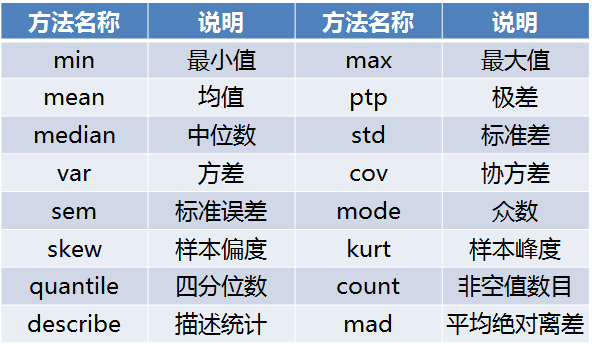

In [61]:
df7 = pd.DataFrame(np.random.randn(5, 6), columns=list('ABCDEF'), index=range(101, 106))
df7["C"] = list("王牌对王牌")
df7

A         B  C         D         E         F
101  0.646122  0.184132  王 -1.148685  0.587094 -1.000974
102  1.099603  0.778289  牌  1.039816 -0.736484 -0.277347
103 -1.166320  0.358129  对 -1.165223  1.635235  0.462554
104  0.234540  1.025843  王 -0.468378 -0.862504  0.047825
105  1.241122 -0.206515  牌  0.329229 -0.422129 -0.688896

In [62]:
# 查看B列和F列特征的均值
df7[["B", "F"]].mean()

B    0.427976
F   -0.291368
dtype: float64

In [64]:
df7.loc[[103, 105], :].values

array([[-1.1663197523701176, 0.3581293477346756, '对', -1.165223116716988,
        1.6352353889528966, 0.462553571633027],
       [1.2411224108458898, -0.20651508862868967, '牌',
        0.32922947820295906, -0.4221290931045322, -0.6888960196707998]],
      dtype=object)

In [48]:
# 查看103和105行特征的方差
df7.loc[[103, 105], :].var(axis=1)

103    0.629796
105    0.595793
dtype: float64

In [49]:
# 查看C列的众数
df7["C"].mode()

0    牌
1    王
dtype: object

### 类别变量频次统计

In [65]:
df7["C"].value_counts()

牌    2
王    2
对    1
Name: C, dtype: int64

**文本单词统计示例**

In [147]:
# !pip install jieba

In [149]:
# !pip install wordcloud

In [150]:
import random
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [155]:
text_data = '''
白色情人节，（英语：White Day；日语：ホワイトデー），订于3月14日，一般认为是对于西方情人节的延续，最早起源于公元三世纪时的罗马。相传罗马皇帝设立情人节是为了纪念自己在2月14日救了一对因违反恋爱结婚禁令而要被处死的恋人。一个月后，也就是3月14日，这对情侣宣誓至死不渝，后来便成为白色情人节开始流传到其他国家。普遍认为日本最早接受并推广这个节日，由于日本强大的文化软实力使得亚洲国家纷纷效仿，于是这个没有准确史料记载的情人节也成为年轻情侣看重的另一个“情人节”。

　　白色情人节流行于日本、中国台湾等地区，在送礼方面也不同：具体为2月14日男方送女方一份礼物，主要是玫瑰花或者巧克力（只是中国大陆和英美法），3月14日白色情人节，就该轮到女方送男方礼物了，（日本，中国台湾是刚好相反的，2月14日是女生送巧克力，3月14日是男生回礼） 在日本，通常欲告白的女方会在情人节（2月14日）的时候送礼给心仪的对象，而收到礼物的一方，则会在3月14日回礼并告诉女方自己的心意。亚洲部分地区的年轻人亦会庆祝这个节日。

　　又叫返情人节，指的是在情人节收到礼物，则在一个月后的3月14日回馈礼物，当然仅仅是回馈你想回的那个人。

　　起源

　　最早诞生于1977年，由日本福冈市博德区的甜点（菓子）制造商「石村万盛堂」所发起，以鼓吹收到心意的一方应该要回礼给对方，作为促销糖果的手段，节日最早称为「糖果赠送日」（キャンデーを赠る日）。自1980年起，因为糖果所使用的砂糖是白色，所以改称为「白色情人节」。

　　不久后，巧克力制造商发现他们也可以在这个节日中获利，因此也开始促销白色的巧克力。现在，在这一天要回礼时，除了糖果与白巧克力之外，还包括其它各种礼品。 目前关于情人节与白色情人节，到底是男先送礼还是女方先送礼，已不再有定论，重点是这样的节日让有情有缘的男女双方都有一个可以发挥与表达自我心意的时机，相关的商人们，当然也就乐得大发利市了。

　　根据日本全国饴菓子工业协同组合的解说，「白色情人节」定在3月14日的原因是由于公元三世纪时，罗马帝国皇帝克劳狄二世在首都罗马宣布废弃所有婚姻的承诺，下令全国男子都要从军。一名叫华伦泰（Sanctus Valentinus）的神父没有遵照这个旨意而继续为相恋的男女举行婚礼。事情被告发后，华伦泰神父被罗马政府捸捕，最后在公元270年2月14日这天被送上了绞架被绞死。而在一个月后的3月14日，这对获救的恋人宣誓恋情将至死不渝，为纪念这天于是另定为白色情人节。但是这个解说是完全没有历史根据的。一开始，3月14日是没有名字的，与2月14日一样都叫做“情人节”。 后来，人们为了把两个节日区分开来，便将3月14日定为“白色情人节”。

　　白色在欧洲国家看来是纯洁、清纯、有灵性的，就好像年轻的少女一般，就像西方人结婚要穿白色婚纱。这便成为了“白色情人节”名称的重要来源之一。因为逐渐的流传与发展，“白色”所代表的更是期盼与幸福，是对恋人的祝福。

　　“白色情人节”最早起源于三世纪时的罗马。罗马皇帝在2月14日救了一对因为原本因违反恋爱结婚禁令而要被处死的恋人，罗马皇帝为了纪念这一天而设立了情人节。而在一个月后的3月14日，这对获救的恋人宣誓恋情将至死不渝，为纪念这天于是另订为白色情人节。而此节日就从欧洲开始流传到世界其它地方。

　　传说 日本的民间传说二月十四号原本是女孩子对男孩子诉表情意的日子，由女孩子送情人礼物给男孩子但是渐渐发展到最后，已不分彼此，现在由谁主动送礼物已经不重要了。在日本如果一方在二月十四日当天收到异性送的情人礼物表达情意，而且对对方也同样有好感或情意时，就会在三月十四日回送对方一份情人礼物，那表示彼此已经心心相印，所以他们就把三月十四日这一天，定为“白色情人节”。

　　寓意

　　期盼和幸福。 White白色：保护感、充满灵性、神圣、和平、纯洁、真实、诚挚和力量、清洁、清纯、浪漫、爽朗、潇洒、高贵、明白、纯粹、澄明、清爽、尊敬、纯净、简洁、谦卑、精密、清白、青春、出生相传，2月14日，男孩送女孩给礼物（一般为玫瑰花）。经过一个月的考虑和考察，到了3月14日，如果女孩回赠男孩礼物（一般送巧克力），就表示女孩认可男孩，可以谈恋爱了。 因此3月14日又称为白色情人节。

　　相比2月14日的热烈，3月14日的故事表明了它更当是一个甜蜜的、相会的日子。

　　习俗

　　由于“白色情人节”起源于欧洲，所以欧洲人对过“白色情人节”已有一定的历史，并已形成了相当成熟的习俗。相传，2月14日，男孩送女孩给礼物（一般为玫瑰花和巧克力）。经过一个月的考虑和考察，到了3月14日，如果女孩回赠男孩礼物（一般送纯手工曲奇），就表示女孩认可男孩，可以谈恋爱了。
'''

In [156]:
# 分词
tokenize_result = jieba.lcut(text_data)
tokenize_result

# 停用词过滤
stopwords = [line.strip() for line in open('./data/stoplist.txt', 'r', encoding='utf-8').readlines()]
words = [word.strip() for word in tokenize_result if (word not in stopwords) and (word.strip())]

words

['白色',
 '情人节',
 '英语',
 'White',
 'Day',
 '日语',
 'ホ',
 'ワ',
 'イ',
 'ト',
 'デ',
 'ー',
 '订于',
 '月',
 '14',
 '日',
 '西方',
 '情人节',
 '延续',
 '最早',
 '起源于',
 '公元',
 '世纪',
 '时',
 '罗马',
 '相传',
 '罗马',
 '皇帝',
 '设立',
 '情人节',
 '纪念',
 '月',
 '14',
 '日救',
 '一对',
 '违反',
 '恋爱',
 '结婚',
 '禁令',
 '处死',
 '恋人',
 '一个月',
 '月',
 '14',
 '日',
 '情侣',
 '宣誓',
 '至死不渝',
 '白色',
 '情人节',
 '流传',
 '国家',
 '普遍认为',
 '日本',
 '最早',
 '接受',
 '推广',
 '节日',
 '日本',
 '强大',
 '文化',
 '软',
 '实力',
 '亚洲',
 '国家',
 '纷纷',
 '效仿',
 '准确',
 '史料',
 '记载',
 '情人节',
 '年轻',
 '情侣',
 '看重',
 '情人节',
 '白色',
 '情人节',
 '流行',
 '日本',
 '中国台湾',
 '地区',
 '送礼',
 '月',
 '14',
 '日',
 '男方',
 '送',
 '女方',
 '一份',
 '礼物',
 '玫瑰花',
 '巧克力',
 '中国',
 '大陆',
 '英美法',
 '月',
 '14',
 '日',
 '白色',
 '情人节',
 '该轮',
 '女方',
 '送',
 '男方',
 '礼物',
 '日本',
 '中国台湾',
 '月',
 '14',
 '日',
 '女生',
 '送',
 '巧克力',
 '月',
 '14',
 '日',
 '男生',
 '回礼',
 '日本',
 '欲',
 '告白',
 '女方',
 '情人节',
 '月',
 '14',
 '日',
 '送礼',
 '心仪',
 '对象',
 '收到',
 '礼物',
 '一方',
 '月',
 '14',
 '日',
 '回礼',
 '告诉',
 '女方',
 '心意',
 '亚洲',
 '地区',
 '年轻人',
 '庆祝',


In [157]:
# 统计词频
words_series = pd.Series(words)
words_series

0         白色
1        情人节
2         英语
3      White
4        Day
5         日语
6          ホ
7          ワ
8          イ
9          ト
10         デ
11         ー
12        订于
13         月
14        14
15         日
16        西方
17       情人节
18        延续
19        最早
20       起源于
21        公元
22        世纪
23         时
24        罗马
25        相传
26        罗马
27        皇帝
28        设立
29       情人节
       ...  
544       已有
545       历史
546       成熟
547       习俗
548       相传
549        月
550       14
551        日
552       男孩
553        送
554       女孩
555       礼物
556      玫瑰花
557      巧克力
558      一个月
559       考察
560        月
561       14
562        日
563       女孩
564       回赠
565       男孩
566       礼物
567        送
568      纯手工
569       曲奇
570       女孩
571       认可
572       男孩
573      谈恋爱
Length: 574, dtype: object

(-0.5, 499.5, 423.5, -0.5)

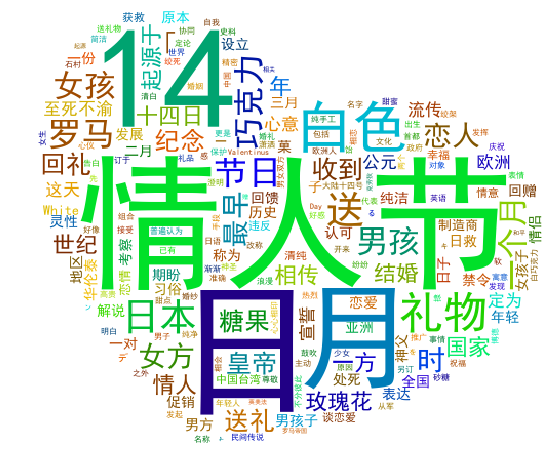

In [158]:
# 统计词频
frequencies = words_series.value_counts()

# 绘制词云
# (1)自定义颜色函数
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    # h = randint(0, 255)  # 从0-255取值，分别是从红→橙→黄→绿→青→蓝→紫
    # 51-70间为较亮的难以看清的黄色，0-15的红色也过于注目，改成随机在 16-50和 71-255间取值
    h = random.choice((random.randint(16, 50), random.randint(71, 255)))
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


# (2)设置背景图片
back_pic = plt.imread("./data/wordcloud_backgroud.jpg")

# (3)生成词云对象
wc = WordCloud(font_path='C:\\Windows\\Fonts\\simhei.ttf',  # 设置字体
               background_color="white",  # 背景颜色
               max_words=200,  # 词云显示的最大词数
               mask=back_pic,  # 设置背景图片
               max_font_size=250,  # 字体最大值
               random_state=42,
               color_func=random_color_func)

# (4)绘图
gar_wordcloud = wc.fit_words(frequencies)  # frequencies是由频数构成的Series的形式，且单词作为索引
plt.figure(figsize=(16, 8))
plt.imshow(gar_wordcloud)
plt.axis('off')